In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [42]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 15:36:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   214MB/s    in 0.3s    

2019-04-12 15:36:40 (214 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [65]:
!unzip /tmp/cats_and_dogs_filtered.zip -d /tmp/

local_zip = '/tmp/cats_and_dogs_filtered.zip'

Archive:  /tmp/cats_and_dogs_filtered.zip
   creating: /tmp/cats_and_dogs_filtered/
  inflating: /tmp/cats_and_dogs_filtered/vectorize.py  
   creating: /tmp/cats_and_dogs_filtered/validation/
   creating: /tmp/cats_and_dogs_filtered/train/
   creating: /tmp/cats_and_dogs_filtered/validation/dogs/
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/d

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(base_dir, 'cats')
validation_dogs_dir = os.path.join(base_dir, 'dogs')




1.   List item
2.   List item



In [72]:
all_cat_files = os.listdir( train_cats_dir )

cats_files = [os.path.join(train_cats_dir, file) for file in all_cat_files][:25]
cats_files

['/tmp/cats_and_dogs_filtered/train/cats/cat.820.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.811.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.131.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.77.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.92.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.284.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.846.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.418.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.7.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.883.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.903.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.828.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.71.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.468.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.956.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.829.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.483.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.288.jpg',
 '/tmp/cats_and

In [80]:
all_dog_files = os.listdir( train_dogs_dir )

dogs_files = [os.path.join(train_dogs_dir, file) for file in all_dog_files][:25]
dogs_files

['/tmp/cats_and_dogs_filtered/train/dogs/dog.940.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.641.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.243.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.755.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.600.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.261.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.809.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.842.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.322.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.64.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.320.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.402.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.452.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.688.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.454.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.359.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.54.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.591.jpg',
 '/tmp/cats_

In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]
  
  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5,5, idx+1)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
  plt.tight_layout()

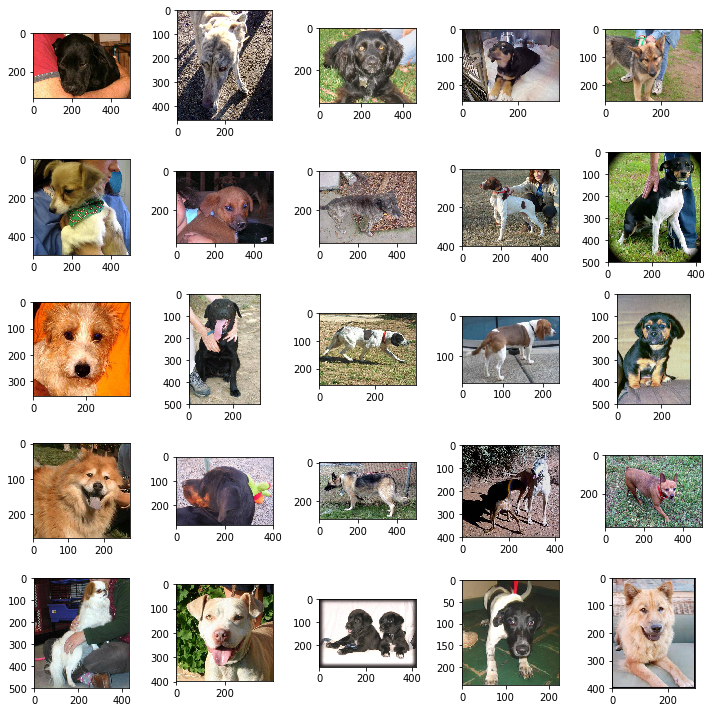

In [93]:
plot_images(train_dogs_dir)

In [106]:
input_shape = (150, 150, 3)

model = Sequential([
  Conv2D(32, (3,3), input_shape=input_shape),
  MaxPool2D((2,2)),

  Conv2D(64, (3,3)),
  MaxPool2D((2,2)),
  
  Conv2D(128, (3,3)),
  MaxPool2D((2,2)),
    
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)             0         
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [107]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [108]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=5,
  validation_data=validation_generator,
  validation_steps=50,
  verbose=2)

Epoch 1/5
 - 141s - loss: 0.7686 - acc: 0.5470 - val_loss: 0.6461 - val_acc: 0.5440
Epoch 2/5
 - 139s - loss: 0.6553 - acc: 0.6170 - val_loss: 0.6266 - val_acc: 0.6250
Epoch 3/5
 - 140s - loss: 0.6467 - acc: 0.6040 - val_loss: 0.6950 - val_acc: 0.6230
Epoch 4/5
 - 138s - loss: 0.6181 - acc: 0.6525 - val_loss: 0.5919 - val_acc: 0.6830
Epoch 5/5
 - 138s - loss: 0.5922 - acc: 0.6765 - val_loss: 0.5845 - val_acc: 0.7000
